Multi-variable Linear Regression
==========================

In this Jupyter Notebook...

* Apply linear regression to predict interaction parameters for polystyrene and tetramethylbisphenol-A polycarbonate

* Use multivariate linear regression to predict specific volume versus temperature and pressure

* Compare experimental measurements and model predictions over the range of conditions

Import the necessary modules

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import json
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

Load the data [see Jeon, Kee Su, Kookheon Char, and Eugene Kim. "Interaction parameter predicted by pressure-volume-temperature properties of miscible polymer blends." Polymer journal 32, no. 1 (2000): 1-7.]

In [3]:
data = np.loadtxt(open("data/poly_spec_vol.csv", "rb"), delimiter=",", skiprows=0)
n_e = len(data)
temperature = data[:,0]
pressure = data[:,1]
spec_vol = data[:,2]
num_pressure = np.array([7,8,8,9,9,10,10,11,13,14,14])

Plot the data

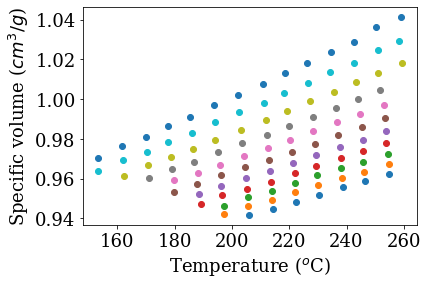

In [4]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

ind0 = 0
for i_p in range(len(num_pressure)):
    indf = ind0 + num_pressure[i_p]
    plt.scatter(temperature[ind0:indf], spec_vol[ind0:indf])
    ind0 = indf

plt.xlabel('Temperature ($^o$C)')
plt.ylabel('Specific volume ($cm^{3}/g$)')

plt.show()

In [5]:
pressure

array([100., 100., 100., 100., 100., 100., 100.,  90.,  90.,  90.,  90.,
        90.,  90.,  90.,  90.,  80.,  80.,  80.,  80.,  80.,  80.,  80.,
        80.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  60.,
        60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  50.,  50.,  50.,
        50.,  50.,  50.,  50.,  50.,  50.,  50.,  40.,  40.,  40.,  40.,
        40.,  40.,  40.,  40.,  40.,  40.,  30.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.])

Perform linear regression for specific volume versus temperature and pressure

In [4]:
tt = np.zeros((3,3))
mt = np.zeros(3)

for i_exp in range(n_e):
    t_vec = np.array([1, temperature[i_exp], pressure[i_exp]])
    tt += np.outer(t_vec, t_vec) / n_e
    mt += spec_vol[i_exp] * t_vec / n_e
    
tt_inv = np.linalg.inv(tt)

In [5]:
a = np.dot(tt_inv, mt)

Plot the results of the linear regression model

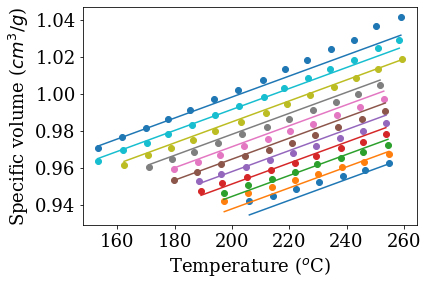

In [6]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

ind0 = 0
for i_p in range(len(num_pressure)):
    indf = ind0 + num_pressure[i_p]    
    spec_vol_model = a[0] + a[1] * temperature[ind0:indf] + a[2] * pressure[ind0]
    plt.scatter(temperature[ind0:indf], spec_vol[ind0:indf])
    plt.plot(temperature[ind0:indf], spec_vol_model)
    ind0 = indf

plt.xlabel('Temperature ($^o$C)')
plt.ylabel('Specific volume ($cm^{3}/g$)')

plt.show()

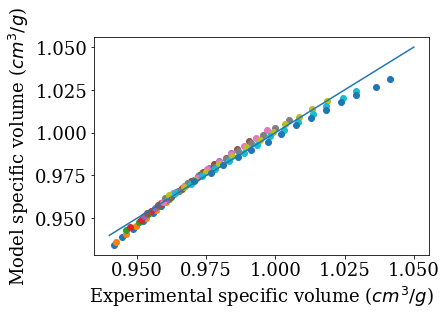

In [7]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

ind0 = 0
for i_p in range(len(num_pressure)):
    indf = ind0 + num_pressure[i_p]    
    spec_vol_model = a[0] + a[1] * temperature[ind0:indf] + a[2] * pressure[ind0]
    plt.scatter(spec_vol[ind0:indf], spec_vol_model)
    ind0 = indf
    
plt.plot(np.array([0.94, 1.05]),np.array([0.94, 1.05]))

plt.xlabel('Experimental specific volume ($cm^{3}/g$)')
plt.ylabel('Model specific volume ($cm^{3}/g$)')

plt.show()